In [1]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from open3d import *                      # open source library for 3D pointcloud visualisation
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


In [2]:
# # Setup:
pipe = rs.pipeline()

# Create a config object
config = rs.config()

# Tell config that we will use a recorded device from filem to be used by the pipeline through playback.
rs.config.enable_device_from_file(config, '/home/xipeng/Documents/20190401_154953.bag')

# Read from camera live
config.enable_stream(rs.stream.depth, 1280, 720, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 1280, 720, rs.format.rgb8, 30)

# Start streaming from file
profile  = pipe.start(config)


# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
  pipe.wait_for_frames()

frameset = pipe.wait_for_frames()

# Store next frameset for later processing:
color_frame = frameset.get_color_frame()
depth_frame = frameset.get_depth_frame()

depth_image = np.asanyarray(depth_frame.get_data())

pc=rs.pointcloud()
# pc.map_to(color_frame)
pointcloud=pc.calculate(depth_frame)
vertices=np.asanyarray(pointcloud.get_vertices())
# pointcloud.export_to_ply("1.ply", color_frame)

# Cleanup:
pipe.stop()
print("Frames Captured")

Frames Captured


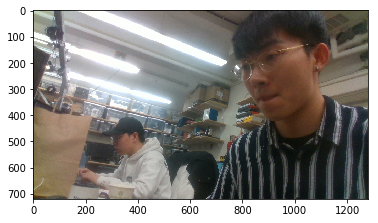

In [3]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.imshow(color)

In [4]:
# View the Point Cloud from array
b = vertices.view(np.float32).reshape(vertices.shape + (-1,))
pcd = PointCloud()
pcd.points = Vector3dVector(b)
draw_geometries([pcd])

In [ ]:
# View the Point Cloud from file
pcd = read_point_cloud("1.ply")
draw_geometries([pcd])